<a href="https://colab.research.google.com/github/zoegarm/Equipo_2_P2_Analisis/blob/main/Pregunta2_respuesta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Equipo 2**
## **Proyecto: Cáncer de mama en México**

#### Integrantes:
- Zoé Ariel García Martínez
- Atenea De La Cruz Brito
- Juan Luis Carrillo de la Cruz

### **Pregunta de investigación 2**
#### **2. ¿Cuál es la relación entre los gastos de salud y los resultados en su política en la lucha contra el cáncer?**

##### **2.1 México**
En esta sección indagaremos cual ha sido el presupuesto para salud por estado de la República Mexicana y lo relacionaremos con los índices de mortalidad por cáncer de mama, con el fin de dilucidar si la dotación de presupuesto para combatir esta enfermedad ha sido adecuada.


####**Dataset 1:** Gasto en Salud en el Sistema Nacional de Salud, México

- **Observaciones:** Estados de la República
- **Periodo:** 1993-2017
- **Archivo:** "1._GFF_01_2017_A_CONS_O.csv"
- **Fuente:** Dirección General de Información en Salud (DGIS) Secretaría de Salud (SSA).

In [7]:
#Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statistics

##### **I. Carga de datos**

In [5]:
## I. Cargar dataset
ssa_gasto = pd.read_csv("https://raw.githubusercontent.com/zoegarm/Equipo_2_P2_Analisis/main/DATA_CLEAN/SSA_mexico_clean/ssa_gasto.csv", sep=',')
ssa_gasto.head()

,Estado,Año,PIB en miles de pesos,Total gasto público en salud,Subtotal no asegurados,Gasto administrativo SSA,Aportaciones federales,Gasto estatal en salud,Subtotal asegurados,IMSS,ISSSTE,Cuotas de recuperación,Primas de seguros médicos,Total gasto en salud % PIB,Total gasto en salud % gasto público,Gasto en salud asegurados per cápita,Gasto en salud no asegurados per cápita,Total gasto en salud per cápita,Aportación federal % no asegurados
0,Estados Unidos Mexicanos,2000-01-01,1.098389e+10,2.843230e+08,92221099.75,32524104.49,45666769.87,14030225.39,1.921019e+08,1.581991e+08,25106991.01,0.0,15242292.93,2.6,16.6,3884.49,1792.72,2817.98,84.8
1,Aguascalientes,2000-01-01,1.233635e+08,3.028818e+06,1059039.52,6816.29,691829.84,360393.39,1.969779e+06,1.791865e+06,167010.80,0.0,49754.01,2.5,12.8,3052.95,2915.51,3003.45,66.0
2,Baja California,2000-01-01,3.617749e+08,7.325541e+06,1142409.28,58962.54,1035444.66,48002.07,6.183132e+06,5.730923e+06,418176.84,0.0,225017.87,2.0,17.6,3720.76,1286.42,2872.94,95.8
3,Baja California Sur,2000-01-01,5.392448e+07,2.110065e+06,548082.52,6526.28,519422.41,22133.83,1.561983e+06,1.237632e+06,317848.31,0.0,5631.66,3.9,17.3,4842.07,3809.58,4523.62,96.0
4,Campeche,2000-01-01,1.191197e+08,2.428181e+06,984654.51,149975.07,697430.08,137249.36,1.443527e+06,9.289885e+05,161987.19,0.0,1734.41,2.0,7.0,4392.01,2646.65,3465.33,86.1


##### **II. Visualizaciones de datos**
- Exploración visual de datos

###### **II.I Binning hexagonal**

In [23]:
ssa_gasto_group = ssa_gasto.groupby('Estado')[['Total gasto en salud % PIB', 'Total gasto en salud % gasto público']].max()
ssa_gasto_group.head()

,Total gasto en salud % PIB,Total gasto en salud % gasto público
Estado,,
Aguascalientes,3.5,30.0
Baja California,3.8,30.8
Baja California Sur,4.1,22.3
Campeche,2.3,12.7
Chiapas,5.8,20.7


In [24]:
ssa_gasto_group['count'] = 1

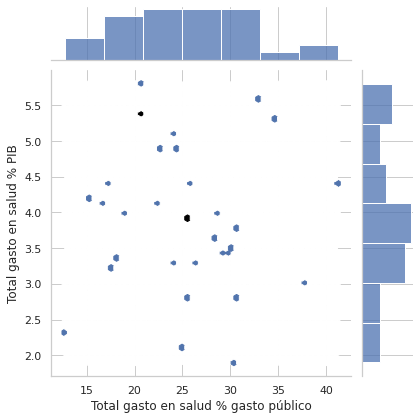

In [25]:
sns.jointplot(x='Total gasto en salud % gasto público', y='Total gasto en salud % PIB', data=ssa_gasto_group, kind='hex', ratio=5, joint_kws={'gridsize': 50});

###### **II.II Gráficas de barras**

In [45]:
#Sólo Estados
filtro_estados = ssa_gasto['Estado'] !='Estados Unidos Mexicanos'
ssa_gasto_estados = ssa_gasto[filtro_estados]
ssa_gasto_estados.head()

,Estado,Año,PIB en miles de pesos,Total gasto público en salud,Subtotal no asegurados,Gasto administrativo SSA,Aportaciones federales,Gasto estatal en salud,Subtotal asegurados,IMSS,ISSSTE,Cuotas de recuperación,Primas de seguros médicos,Total gasto en salud % PIB,Total gasto en salud % gasto público,Gasto en salud asegurados per cápita,Gasto en salud no asegurados per cápita,Total gasto en salud per cápita,Aportación federal % no asegurados
1,Aguascalientes,2000-01-01,1.233635e+08,3028818.49,1059039.52,6816.29,691829.84,360393.39,1969778.97,1791865.29,167010.80,0.0,49754.01,2.5,12.8,3052.95,2915.51,3003.45,66.0
2,Baja California,2000-01-01,3.617749e+08,7325540.79,1142409.28,58962.54,1035444.66,48002.07,6183131.51,5730922.81,418176.84,0.0,225017.87,2.0,17.6,3720.76,1286.42,2872.94,95.8
3,Baja California Sur,2000-01-01,5.392448e+07,2110065.10,548082.52,6526.28,519422.41,22133.83,1561982.58,1237631.99,317848.31,0.0,5631.66,3.9,17.3,4842.07,3809.58,4523.62,96.0
4,Campeche,2000-01-01,1.191197e+08,2428181.38,984654.51,149975.07,697430.08,137249.36,1443526.87,928988.47,161987.19,0.0,1734.41,2.0,7.0,4392.01,2646.65,3465.33,86.1
5,Coahuila de Zaragoza,2000-01-01,3.113629e+08,7799420.03,1234103.23,230397.94,894638.59,109066.70,6565316.80,6025755.93,468071.39,0.0,173783.72,2.5,19.8,3534.59,2301.10,3258.24,91.2


In [70]:
#Agregación, groupby
gasto_salud_por_estado = ssa_gasto_estados.groupby('Estado')['Total gasto en salud per cápita'].agg(pd.Series.mean)
gasto_salud_por_estado.head()

Estado
Aguascalientes         4482.525556
Baja California        4101.594444
Baja California Sur    6045.192222
Campeche               5662.099444
Chiapas                2721.615000
Name: Total gasto en salud per cápita, dtype: float64

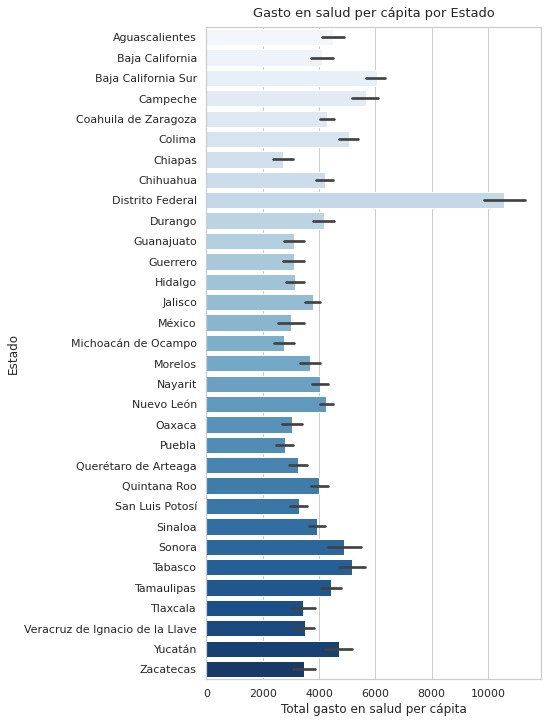

In [69]:
#Gráfica de barras
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(6,12))
ax = fig.add_subplot()
ax.set_title('Gasto en salud per cápita por Estado', fontsize=13, pad=10);
sns.barplot(x="Total gasto en salud per cápita", y="Estado", data=ssa_gasto_estados, ax=ax, palette='Blues');

#### **Dataset 2:** Mortalidad cáncer de mama, México
- **Observaciones:** Estados de la República
- **Periodo:** 2000-2015
- **Archivo:** "MortalidadCaMa2000a2015.csv"
- **Fuente:** Dirección General de Información en Salud (DGIS) Secretaría de Salud (SSA)
- **Descripción:** Defunciones de mujeres de 25 años y más por tumor maligno de mama (C50), 2000-2015

##### **I. Carga de datos**

In [71]:
## I.Cargar datos en formato csv
#NOTA: Archivo en  latin-1
mortalidad = pd.read_csv("https://raw.githubusercontent.com/zoegarm/Equipo_2_P2_Analisis/main/DATA_CLEAN/SSA_mexico_clean/ssa_mortalidad.csv", sep=',', encoding='latin-1')
mortalidad.head()

,Estado,num_2000,tasa_2000,num_2001,tasa_2001,num_2002,tasa_2002,num_2003,tasa_2003,num_2004,tasa_2004,num_2005,tasa_2005,num_2006,tasa_2006,num_2007,tasa_2007,num_2008,tasa_2008,num_2009,tasa_2009,num_2010,tasa_2010,num_2011,tasa_2011,num_2012,tasa_2012,num_2013,tasa_2013,num_2014,tasa_2014,num_2015,tasa_2015
0,Nacional,3419,14.1,3563,14.3,3822,14.9,3861,14.7,4150,15.4,4205,15.2,4440,15.7,4581,15.8,4802,16.2,4893,16.1,5034,16.2,5206,16.3,5583,17.1,5405,16.3,5974,17.6,6252,18.0
1,Aguascalientes,36,15.6,31,13.0,37,15.0,40,15.8,42,16.1,50,18.6,37,13.4,49,17.2,69,23.5,50,16.6,45,14.5,59,18.5,69,21.1,55,16.4,66,19.2,71,20.2
2,Baja California,98,16.7,102,16.6,103,16.1,105,15.7,120,17.3,126,17.5,129,17.3,148,19.2,153,19.2,161,19.6,163,19.3,166,19.1,180,20.1,178,19.4,188,19.9,213,22.0
3,Baja California Sur,20,19.1,19,17.3,20,17.4,27,22.4,23,18.2,25,18.9,32,23.1,34,23.4,34,22.3,33,20.7,31,18.6,39,22.3,36,19.7,34,17.9,31,15.6,33,16.0
4,Campeche,10,6.3,13,7.9,16,9.4,15,8.5,20,10.9,22,11.6,30,15.3,13,6.4,19,9.1,26,12.1,26,11.7,22,9.6,21,8.9,25,10.3,17,6.8,29,11.4


##### **II. Visualización de datos**

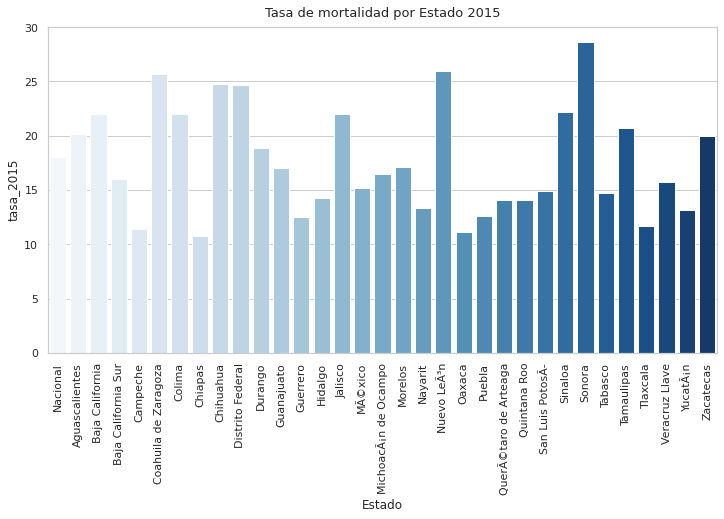

In [84]:
#Boxplot
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax.set_title('Tasa de mortalidad por Estado 2015', fontsize=13, pad=10)
ax.set_ylabel('Tasa de mortalidad %')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.barplot(x="Estado", y="tasa_2015", data=mortalidad, ax=ax, palette='Blues');

##### **2.2. OCDE**

En esta sección revisaremos el gasto en salud de los países miembros de la Organización para la Cooperación y el Desarrollo Económico (OCDE), del cual forma parte México. Asimismo, revisaremos indicadores sobre la incidencia del cáncer de mama en dichos países, con el fin de relacionar el gasto devengado en materia sanitaria con las estrategias para combatir el cáncer y sus resultados.

####**Dataset 3:** Global Health Expenditure Database (GHED), OMS

- **Observaciones:** 37 países miembros
- **Periodo:** 2000-2018
- **Archivo:** "WHO_NHA_indicators.csv"
- **Fuente:** Data Explorer, Organización Mundial de la Salud (OMS).
- **Descripción:** Gasto en Salud expresado como porcentaje del PIB a precios constantes. PPP indica precio paridad de producto, es decir, está normalizado par su comparación entre países con diferentes tipos de cambio y niveles de inflación. 


##### **I. Carga de datos**

In [94]:
## I.Cargar datos en formato csv
gasto_ocde = pd.read_csv("https://raw.githubusercontent.com/zoegarm/Equipo_2_P2_Analisis/main/DATA_CLEAN/OCDE_clean/ocde_gasto.csv", sep=',')
gasto_ocde.head(3)

,Country,Indicator,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Canada,Gasto en Salud % PIB,8,9,9,9,9,9,9,9,10,11,11,10,10,10,10,11,11,11,11
1,Canada,Gasto en Salud PPP per cápita,2430,2618,2758,2928,3087,3290,3555,3718,3855,4140,4257,4273,4384,4553,4660,4729,4909,5023,5200
2,Canada,Gasto Público % Gasto en Salud,73,73,72,73,73,73,73,73,73,73,73,74,74,74,74,74,73,73,73


##### **II. Procesamiento y exploración**

In [86]:
#Filtrar sólo indicador 'Gasto en Salud % PIB'
ocde_pib = gasto_ocde['Indicator'] == 'Gasto en Salud % PIB'
ocde_pib.head()

0     True
1    False
2    False
3    False
4     True
Name: Indicator, dtype: bool

In [95]:
#Aplicar selección
gasto_ocde_pib = gasto_ocde[ocde_pib]
gasto_ocde_pib.head(3)

,Country,Indicator,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Canada,Gasto en Salud % PIB,8,9,9,9,9,9,9,9,10,11,11,10,10,10,10,11,11,11,11
4,Chile,Gasto en Salud % PIB,7,7,7,7,7,7,6,6,7,7,7,7,7,7,8,8,9,9,9
8,Colombia,Gasto en Salud % PIB,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,8,8,8,8


In [96]:
#Eliminar columna indicador, ya no es relevante
del gasto_ocde_pib['Indicator']
gasto_ocde_pib.head(3)

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Canada,8,9,9,9,9,9,9,9,10,11,11,10,10,10,10,11,11,11,11
4,Chile,7,7,7,7,7,7,6,6,7,7,7,7,7,7,8,8,9,9,9
8,Colombia,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,8,8,8,8


In [101]:
#Cambiar índice
gasto_ocde_pib.set_index('Country')
gasto_ocde_pib.tail()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
128,United Kingdom,7,8,8,8,8,9,9,9,9,10,10,10,10,10,10,10,10,10,10
132,Australia,8,8,8,8,8,8,8,8,8,9,8,9,9,9,9,9,9,9,9
136,Japan,7,7,7,8,8,8,8,8,8,9,9,11,11,11,11,11,11,11,11
140,New Zealand,7,8,8,8,8,8,9,8,9,10,10,10,10,9,9,9,9,9,9
144,Republic of Korea,4,4,4,4,4,5,5,5,5,6,6,6,6,6,6,7,7,7,8


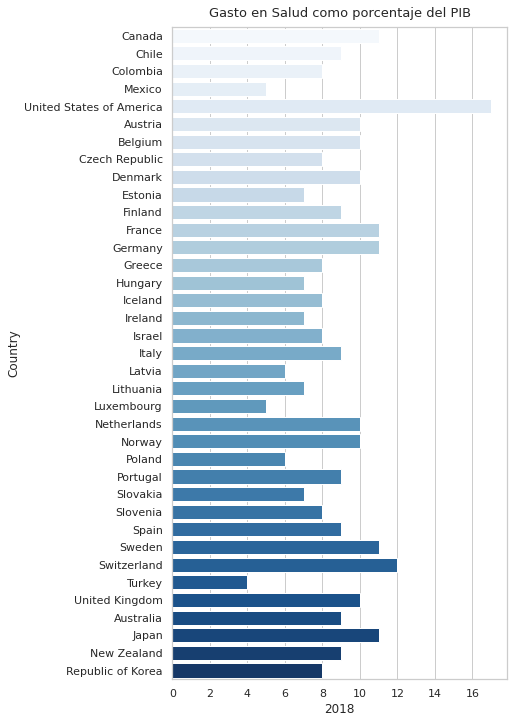

In [121]:
#Visualización
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(6,12))
ax = fig.add_subplot()
ax.set_title('Gasto en Salud como porcentaje del PIB', fontsize=13, pad=10);
sns.barplot(x="2018", y="Country", data=gasto_ocde_pib, ax=ax, palette='Blues');

####**Dataset 4:** Health Status: Cancer, OCDE

- **Observaciones:** 37 países miembros
- **Periodo:** 2000-2012
- **Archivo:** "HEALTH_STAT_24022021235442318.csv"
- **Fuente:** OECD Statistics technology, Organización para la Cooperación y el Desarrollo Económico (OCDE).
- **Descripción:** Variable de interés, CANCBREC | Malignant neoplasms of female breast.


##### **I. Carga de datos**

In [122]:
## I.Cargar datos en formato csv
cancer_ocde = pd.read_csv("https://raw.githubusercontent.com/zoegarm/Equipo_2_P2_Analisis/main/DATA_CLEAN/OCDE_clean/ocde_cancer.csv", sep=',')
cancer_ocde.head()

,VAR,Variable,Country,Year,Value
0,CANCTOCA,Malignant neoplasms,Australia,2002-01-01,312.0
1,CANCTOCA,Malignant neoplasms,Australia,2008-01-01,314.1
2,CANCTOCA,Malignant neoplasms,Australia,2012-01-01,323.0
3,CANCCOLC,Malignant neoplasms of colon,Australia,2002-01-01,41.7
4,CANCCOLC,Malignant neoplasms of colon,Australia,2008-01-01,38.7


##### **II. Procesamiento y exploración**

In [126]:
#Valores únicos de variable para encontrar cáncer de mama
cancer_ocde['Variable'].unique()
#Nota: El resultado que nos interesa es sólo: 'Malignant neoplasms of female breast'

array(['Malignant neoplasms', 'Malignant neoplasms of colon',
       'Malignant neoplasms of lung',
       'Malignant neoplasms of female breast',
       'Malignant neoplasms of cervix', 'Malignant neoplasms of prostate'],
      dtype=object)

In [127]:
#Subconjunto sólo con información de cáncer de mama
cancer_mama = cancer_ocde['Variable'] == 'Malignant neoplasms of female breast'
cancer_mama

0       False
1       False
2       False
3       False
4       False
        ...  
2971    False
2972    False
2973    False
2974    False
2975    False
Name: Variable, Length: 2976, dtype: bool

In [128]:
#Aplicar selección
cancer_mama_ocde = cancer_ocde[cancer_mama]
cancer_mama_ocde.head()

,VAR,Variable,Country,Year,Value
369,CANCBREC,Malignant neoplasms of female breast,Australia,2002-01-01,83.2
370,CANCBREC,Malignant neoplasms of female breast,Australia,2008-01-01,84.8
371,CANCBREC,Malignant neoplasms of female breast,Australia,2012-01-01,86.0
387,CANCBREC,Malignant neoplasms of female breast,Austria,2000-01-01,67.2
388,CANCBREC,Malignant neoplasms of female breast,Austria,2002-01-01,70.5


In [129]:
#Eliminar columnas irrelevantes de subconjunto
cancer_mama_ocde = cancer_mama_ocde.drop(['VAR', 'Variable'], axis=1)
cancer_mama_ocde.head()

,Country,Year,Value
369,Australia,2002-01-01,83.2
370,Australia,2008-01-01,84.8
371,Australia,2012-01-01,86.0
387,Austria,2000-01-01,67.2
388,Austria,2002-01-01,70.5


In [ ]:
#Tipo de datos
cancer_mama_ocde_drop.dtypes

Country            object
Year       datetime64[ns]
Value             float64
dtype: object

In [130]:
#Cambiar índice a Year
cancer_mama_ocde = cancer_mama_ocde.set_index('Year')
cancer_mama_ocde.head()

,Country,Value
Year,,
2002-01-01,Australia,83.2
2008-01-01,Australia,84.8
2012-01-01,Australia,86.0
2000-01-01,Austria,67.2
2002-01-01,Austria,70.5


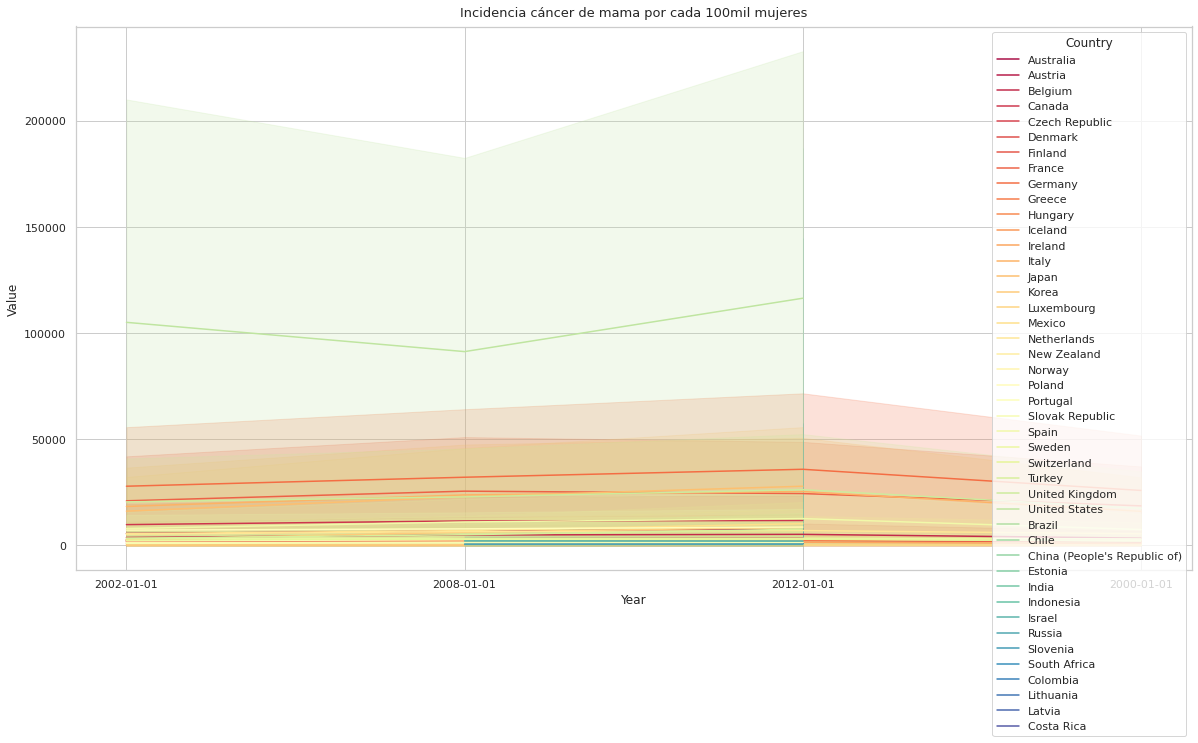

In [144]:
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
ax.set_title('Incidencia cáncer de mama por cada 100mil mujeres', fontsize=13, pad=10);
sns.lineplot(x="Year", y="Value", hue='Country', data=cancer_mama_ocde, ax=ax, palette='Spectral', legend='brief');

###**Fuentes de bases de datos:**
#####**Pregunta 2**
DGIS (9 de mayo de 2019). “Gasto en Salud, 1993-2017 (miles de pesos constantes, 2017=100)”, Dirección General de Información en Salud (DGIS) Secretaría de Salud (SSA), México. Recuperado de: http://www.dgis.salud.gob.mx/descargas/xls/1._GFF_01_2017_A_CONS_O.xlsx

DGIS (2 de diciembre de 2016). "Defunciones de mujeres de 25 años y más por tumor maligno de mama (C50), 2000-2015", Dirección General de Información en Salud (DGIS) Secretaría de Salud (SSA), México. Recuperado de: https://www.gob.mx/cms/uploads/attachment/file/269549/MortalidadCaMa2000a2015.pdf

OCDE (1 de julio de 2020). “Health Status: Cancer”, OECD Statistics technology, Organización para la Cooperación y el Desarrollo Económico (OCDE). Recuperado de: https://stats.oecd.org/index.aspx?queryid=30121#

OMS (2 de marzo de 2021). “Global Health Expenditure Database (GHED)”, Data Explorer, Organización Mundial de la Salud (OMS). Recuperado de: https://apps.who.int/nha/database/Select/Indicators/en